In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns

In [131]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', 100)
pd.set_option('display.float_format', lambda x: '%.6f'% x)

In [132]:
df_perf = pd.read_csv('df_perf.csv')
df_perf.shape

(320772, 40)

# Analyse varaible univariée et bivariée
1. Je voulais savoir dans quels pays le nutri-score est le plus utilisé.

In [133]:
pays = df_perf['countries_fr'].value_counts()

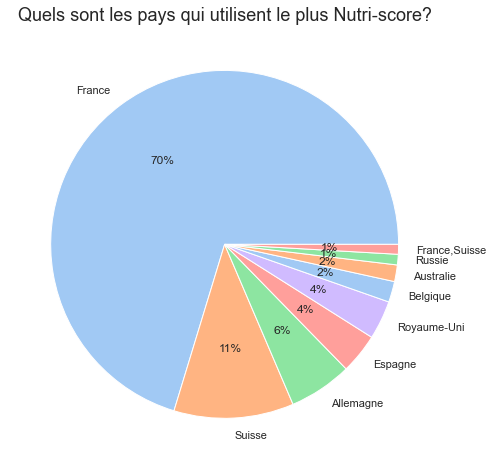

In [134]:
plt.figure(figsize=(8,8))
colors = sns.color_palette('pastel')[0:5]
plt.pie(pays[1:10], labels= pays[1:10].index, colors=colors, autopct='%.0f%%')
plt.title('Quels sont les pays qui utilisent le plus Nutri-score?', fontsize=18)
plt.show()

2. En suite, je pose la question sur la distribution de nombre de produits par nutri grade, de A à E

In [135]:
produit = df_perf['nutrition_grade_fr'].value_counts().sort_index()

In [136]:
produit = pd.DataFrame(produit)

In [137]:
produit.index

Float64Index([1.0, 2.0, 3.0, 4.0, 5.0], dtype='float64')

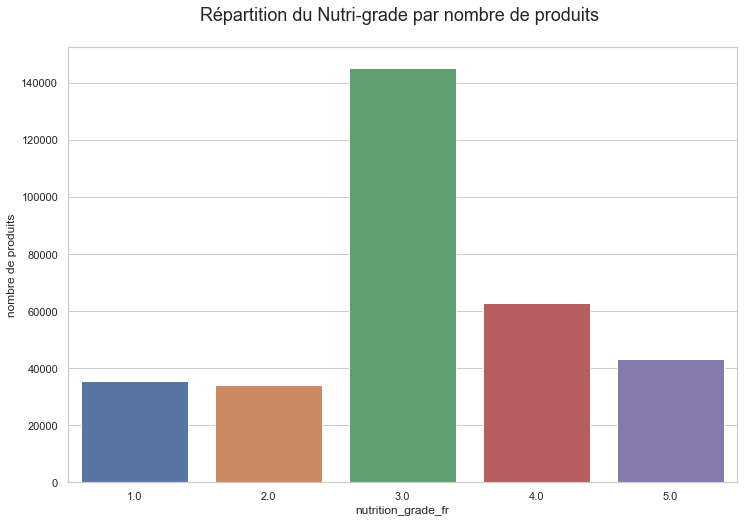

In [138]:
plt.figure(figsize=(12,8))
sns.barplot(data=produit, x=produit.index, y='nutrition_grade_fr') # color=['darkgreen','green', 'gold','orange','red']
plt.xlabel('nutrition_grade_fr')
plt.ylabel('nombre de produits')
plt.title('Répartition du Nutri-grade par nombre de produits \n', fontsize=18)
plt.show()

3. Comment distribue-t-il le nutrition score dans le nombre de produits?

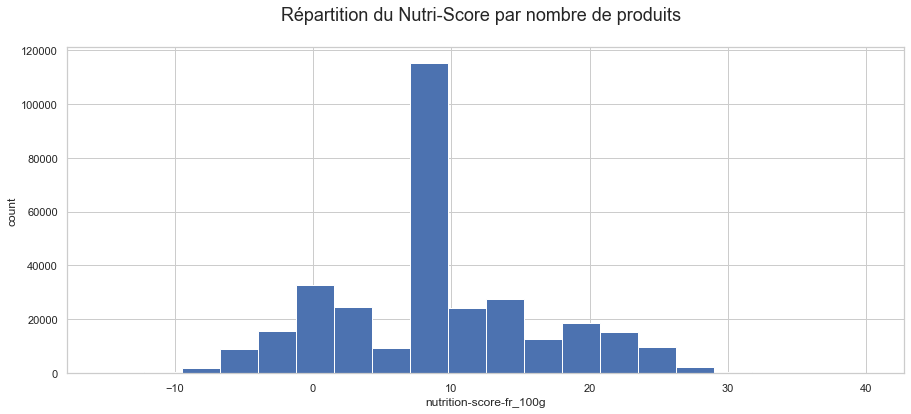

In [139]:
sns.set_theme(style="whitegrid")
fig,ax = plt.subplots(1,1, figsize = (15,6))
ax.hist(df_perf['nutrition-score-fr_100g'], bins = 20)
plt.xlabel('nutrition-score-fr_100g')
plt.ylabel('count')
plt.title('Répartition du Nutri-Score par nombre de produits  \n', fontsize=18)
plt.show()

4. Les variables liées aux vitamines, minéraux, fibre, fruits-vegetables-nuts, protein m'intéressent. 

In [140]:
col_index = {}
i = 0
for col in df_perf.columns:
    col_index[col] = i
    i = i + 1
print(col_index)

{'product_name': 0, 'categories_fr': 1, 'countries_fr': 2, 'nutrition_grade_fr': 3, 'sugars_100g': 4, 'fiber_100g': 5, 'proteins_100g': 6, 'fruits-vegetables-nuts_100g': 7, 'collagen-meat-protein-ratio_100g': 8, 'salt_100g': 9, 'sodium_100g': 10, 'vitamin-a_100g': 11, 'beta-carotene_100g': 12, 'vitamin-d_100g': 13, 'vitamin-e_100g': 14, 'vitamin-k_100g': 15, 'vitamin-c_100g': 16, 'vitamin-b1_100g': 17, 'vitamin-b2_100g': 18, 'vitamin-pp_100g': 19, 'vitamin-b6_100g': 20, 'vitamin-b9_100g': 21, 'folates_100g': 22, 'vitamin-b12_100g': 23, 'potassium_100g': 24, 'chloride_100g': 25, 'calcium_100g': 26, 'phosphorus_100g': 27, 'iron_100g': 28, 'magnesium_100g': 29, 'zinc_100g': 30, 'copper_100g': 31, 'manganese_100g': 32, 'fluoride_100g': 33, 'selenium_100g': 34, 'chromium_100g': 35, 'molybdenum_100g': 36, 'iodine_100g': 37, 'nutrition-score-fr_100g': 38, 'grade_map': 39}


In [141]:
df_vitam = df_perf.drop(['product_name','categories_fr','countries_fr','grade_map'], axis=1)

In [142]:
df_vitam_short = df_perf.iloc[:, np.r_[3:9, 10,16,18, 24,26,29,30,32]] #short version pour sortir pairplot

In [143]:
df_vitam_short.head()

,nutrition_grade_fr,sugars_100g,fiber_100g,proteins_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,sodium_100g,vitamin-c_100g,vitamin-b2_100g,potassium_100g,calcium_100g,magnesium_100g,zinc_100g,manganese_100g
0,3.000000,16.003484,2.862111,7.075940,31.458587,15.412121,0.798815,0.023367,0.259007,0.424635,0.125163,0.534143,0.007950,0.003014
1,4.000000,14.290000,3.600000,3.570000,31.458587,15.412121,0.000000,0.021400,0.259007,0.424635,0.000000,0.534143,0.007950,0.003014
2,2.000000,17.860000,7.100000,17.860000,31.458587,15.412121,0.250000,0.000000,0.259007,0.424635,0.071000,0.534143,0.007950,0.003014
3,4.000000,3.570000,7.100000,17.860000,31.458587,15.412121,0.482000,0.023367,0.259007,0.424635,0.143000,0.534143,0.007950,0.003014
4,3.000000,16.003484,5.700000,8.570000,31.458587,15.412121,0.798815,0.023367,0.259007,0.424635,0.125163,0.534143,0.007950,0.003014


In [144]:
df_vitam_short.shape

(320772, 14)

Nous regardons les relations par pairs des variables.

In [145]:
#sns.pairplot(data=df_vitam_short.sample(frac=0.05), diag_kind='hist', hue='nutrition_grade_fr' ) # KDE on a single observation raised error 'singular martix'.

5. On utilise satterplot pour voir la relation entre feature 'vitamine_a' et 'vitamine_c'

(0.0, 0.05)

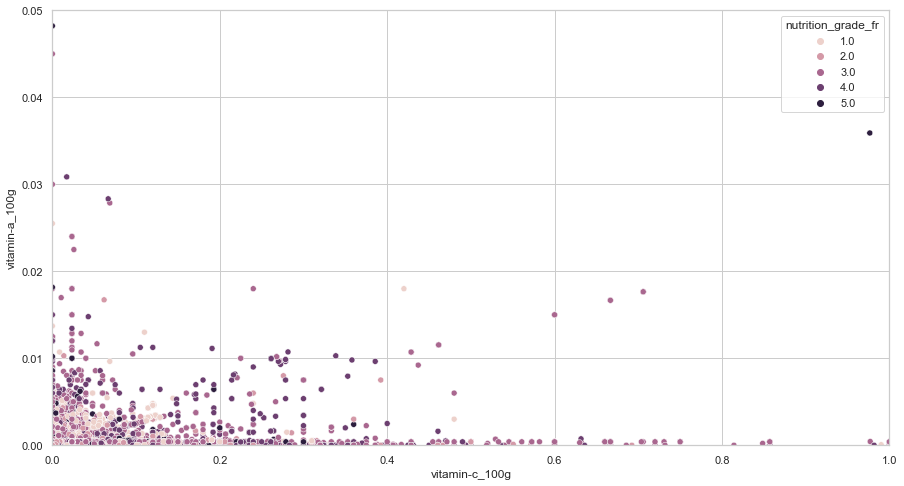

In [146]:
plt.figure(figsize=(15,8))
sns.set_theme(style='whitegrid')
sns.scatterplot(data = df_perf , x='vitamin-c_100g', y='vitamin-a_100g', hue='nutrition_grade_fr')
plt.xlim(0,1)
plt.ylim(0,0.05)

Pourquoi pas se concentrer sur les vitamines et les oligo-éléments? Pour rendre les chiffres plus lisibles, 
transformons-nous les micronutriments en milligramme(mg)!

In [147]:
col_index = {}
i = 0
for col in df_vitam.columns:
    col_index[col] = i
    i = i + 1
print(col_index)

{'nutrition_grade_fr': 0, 'sugars_100g': 1, 'fiber_100g': 2, 'proteins_100g': 3, 'fruits-vegetables-nuts_100g': 4, 'collagen-meat-protein-ratio_100g': 5, 'salt_100g': 6, 'sodium_100g': 7, 'vitamin-a_100g': 8, 'beta-carotene_100g': 9, 'vitamin-d_100g': 10, 'vitamin-e_100g': 11, 'vitamin-k_100g': 12, 'vitamin-c_100g': 13, 'vitamin-b1_100g': 14, 'vitamin-b2_100g': 15, 'vitamin-pp_100g': 16, 'vitamin-b6_100g': 17, 'vitamin-b9_100g': 18, 'folates_100g': 19, 'vitamin-b12_100g': 20, 'potassium_100g': 21, 'chloride_100g': 22, 'calcium_100g': 23, 'phosphorus_100g': 24, 'iron_100g': 25, 'magnesium_100g': 26, 'zinc_100g': 27, 'copper_100g': 28, 'manganese_100g': 29, 'fluoride_100g': 30, 'selenium_100g': 31, 'chromium_100g': 32, 'molybdenum_100g': 33, 'iodine_100g': 34, 'nutrition-score-fr_100g': 35}


In [148]:
df_vitam.iloc[:,8:35].head()

,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g
0,0.000397,0.518715,0.000008,0.056705,0.034219,0.023367,0.325574,0.259007,0.020303,0.023378,0.006898,0.205856,0.000089,0.424635,0.092638,0.125163,0.617282,0.003652,0.534143,0.007950,0.025794,0.003014,0.012161,0.003126,0.001690,0.000401,0.000427
1,0.000000,0.518715,0.000008,0.056705,0.034219,0.021400,0.325574,0.259007,0.020303,0.023378,0.006898,0.205856,0.000089,0.424635,0.092638,0.000000,0.617282,0.001290,0.534143,0.007950,0.025794,0.003014,0.012161,0.003126,0.001690,0.000401,0.000427
2,0.000000,0.518715,0.000008,0.056705,0.034219,0.000000,0.325574,0.259007,0.020303,0.023378,0.006898,0.205856,0.000089,0.424635,0.092638,0.071000,0.617282,0.001290,0.534143,0.007950,0.025794,0.003014,0.012161,0.003126,0.001690,0.000401,0.000427
3,0.000397,0.518715,0.000008,0.056705,0.034219,0.023367,0.325574,0.259007,0.020303,0.023378,0.006898,0.205856,0.000089,0.424635,0.092638,0.143000,0.617282,0.005140,0.534143,0.007950,0.025794,0.003014,0.012161,0.003126,0.001690,0.000401,0.000427
4,0.000397,0.518715,0.000008,0.056705,0.034219,0.023367,0.325574,0.259007,0.020303,0.023378,0.006898,0.205856,0.000089,0.424635,0.092638,0.125163,0.617282,0.003652,0.534143,0.007950,0.025794,0.003014,0.012161,0.003126,0.001690,0.000401,0.000427


In [149]:
#df_vitam.iloc[:,8:35].apply(lambda p : p*1000, axis=1)

6. On intègre les flag catégorie pour voir rélations entre différentes catégories et les vitamines.

In [150]:
df_flg = pd.read_csv('mydfcat.csv', sep='\t')

c:\Users\USER\Documents\Python_Hello\.venv\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [151]:
df_flg.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'fruits-vegetables-nuts_100g', 'collagen-meat-protein-ratio_100g',
       'cocoa_100g', 'chlorophyl_100g', 'carbon-footprint_100g',
       'nutrition-score-fr_100g', 'nutrition-score-uk_100g',
       'glycemic-index_100g', 'water-hardness_100g', 'flag_cat'],
      dtype='object', length=163)

In [152]:
df_vitam['flag'] = df_flg['flag_cat']

In [153]:
df_vitam.head()

,nutrition_grade_fr,sugars_100g,fiber_100g,proteins_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,salt_100g,sodium_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,nutrition-score-fr_100g,flag
0,3.000000,16.003484,2.862111,7.075940,31.458587,15.412121,2.028624,0.798815,0.000397,0.518715,0.000008,0.056705,0.034219,0.023367,0.325574,0.259007,0.020303,0.023378,0.006898,0.205856,0.000089,0.424635,0.092638,0.125163,0.617282,0.003652,0.534143,0.007950,0.025794,0.003014,0.012161,0.003126,0.001690,0.000401,0.000427,9.165535,NaN
1,4.000000,14.290000,3.600000,3.570000,31.458587,15.412121,0.000000,0.000000,0.000000,0.518715,0.000008,0.056705,0.034219,0.021400,0.325574,0.259007,0.020303,0.023378,0.006898,0.205856,0.000089,0.424635,0.092638,0.000000,0.617282,0.001290,0.534143,0.007950,0.025794,0.003014,0.012161,0.003126,0.001690,0.000401,0.000427,14.000000,NaN
2,2.000000,17.860000,7.100000,17.860000,31.458587,15.412121,0.635000,0.250000,0.000000,0.518715,0.000008,0.056705,0.034219,0.000000,0.325574,0.259007,0.020303,0.023378,0.006898,0.205856,0.000089,0.424635,0.092638,0.071000,0.617282,0.001290,0.534143,0.007950,0.025794,0.003014,0.012161,0.003126,0.001690,0.000401,0.000427,0.000000,NaN
3,4.000000,3.570000,7.100000,17.860000,31.458587,15.412121,1.224280,0.482000,0.000397,0.518715,0.000008,0.056705,0.034219,0.023367,0.325574,0.259007,0.020303,0.023378,0.006898,0.205856,0.000089,0.424635,0.092638,0.143000,0.617282,0.005140,0.534143,0.007950,0.025794,0.003014,0.012161,0.003126,0.001690,0.000401,0.000427,12.000000,NaN
4,3.000000,16.003484,5.700000,8.570000,31.458587,15.412121,2.028624,0.798815,0.000397,0.518715,0.000008,0.056705,0.034219,0.023367,0.325574,0.259007,0.020303,0.023378,0.006898,0.205856,0.000089,0.424635,0.092638,0.125163,0.617282,0.003652,0.534143,0.007950,0.025794,0.003014,0.012161,0.003126,0.001690,0.000401,0.000427,9.165535,NaN


In [154]:
# filtre les données avec flag
vitam_flg = df_vitam[df_vitam['flag'].isna() == False]

In [155]:
vitam_flg.shape

(55183, 37)

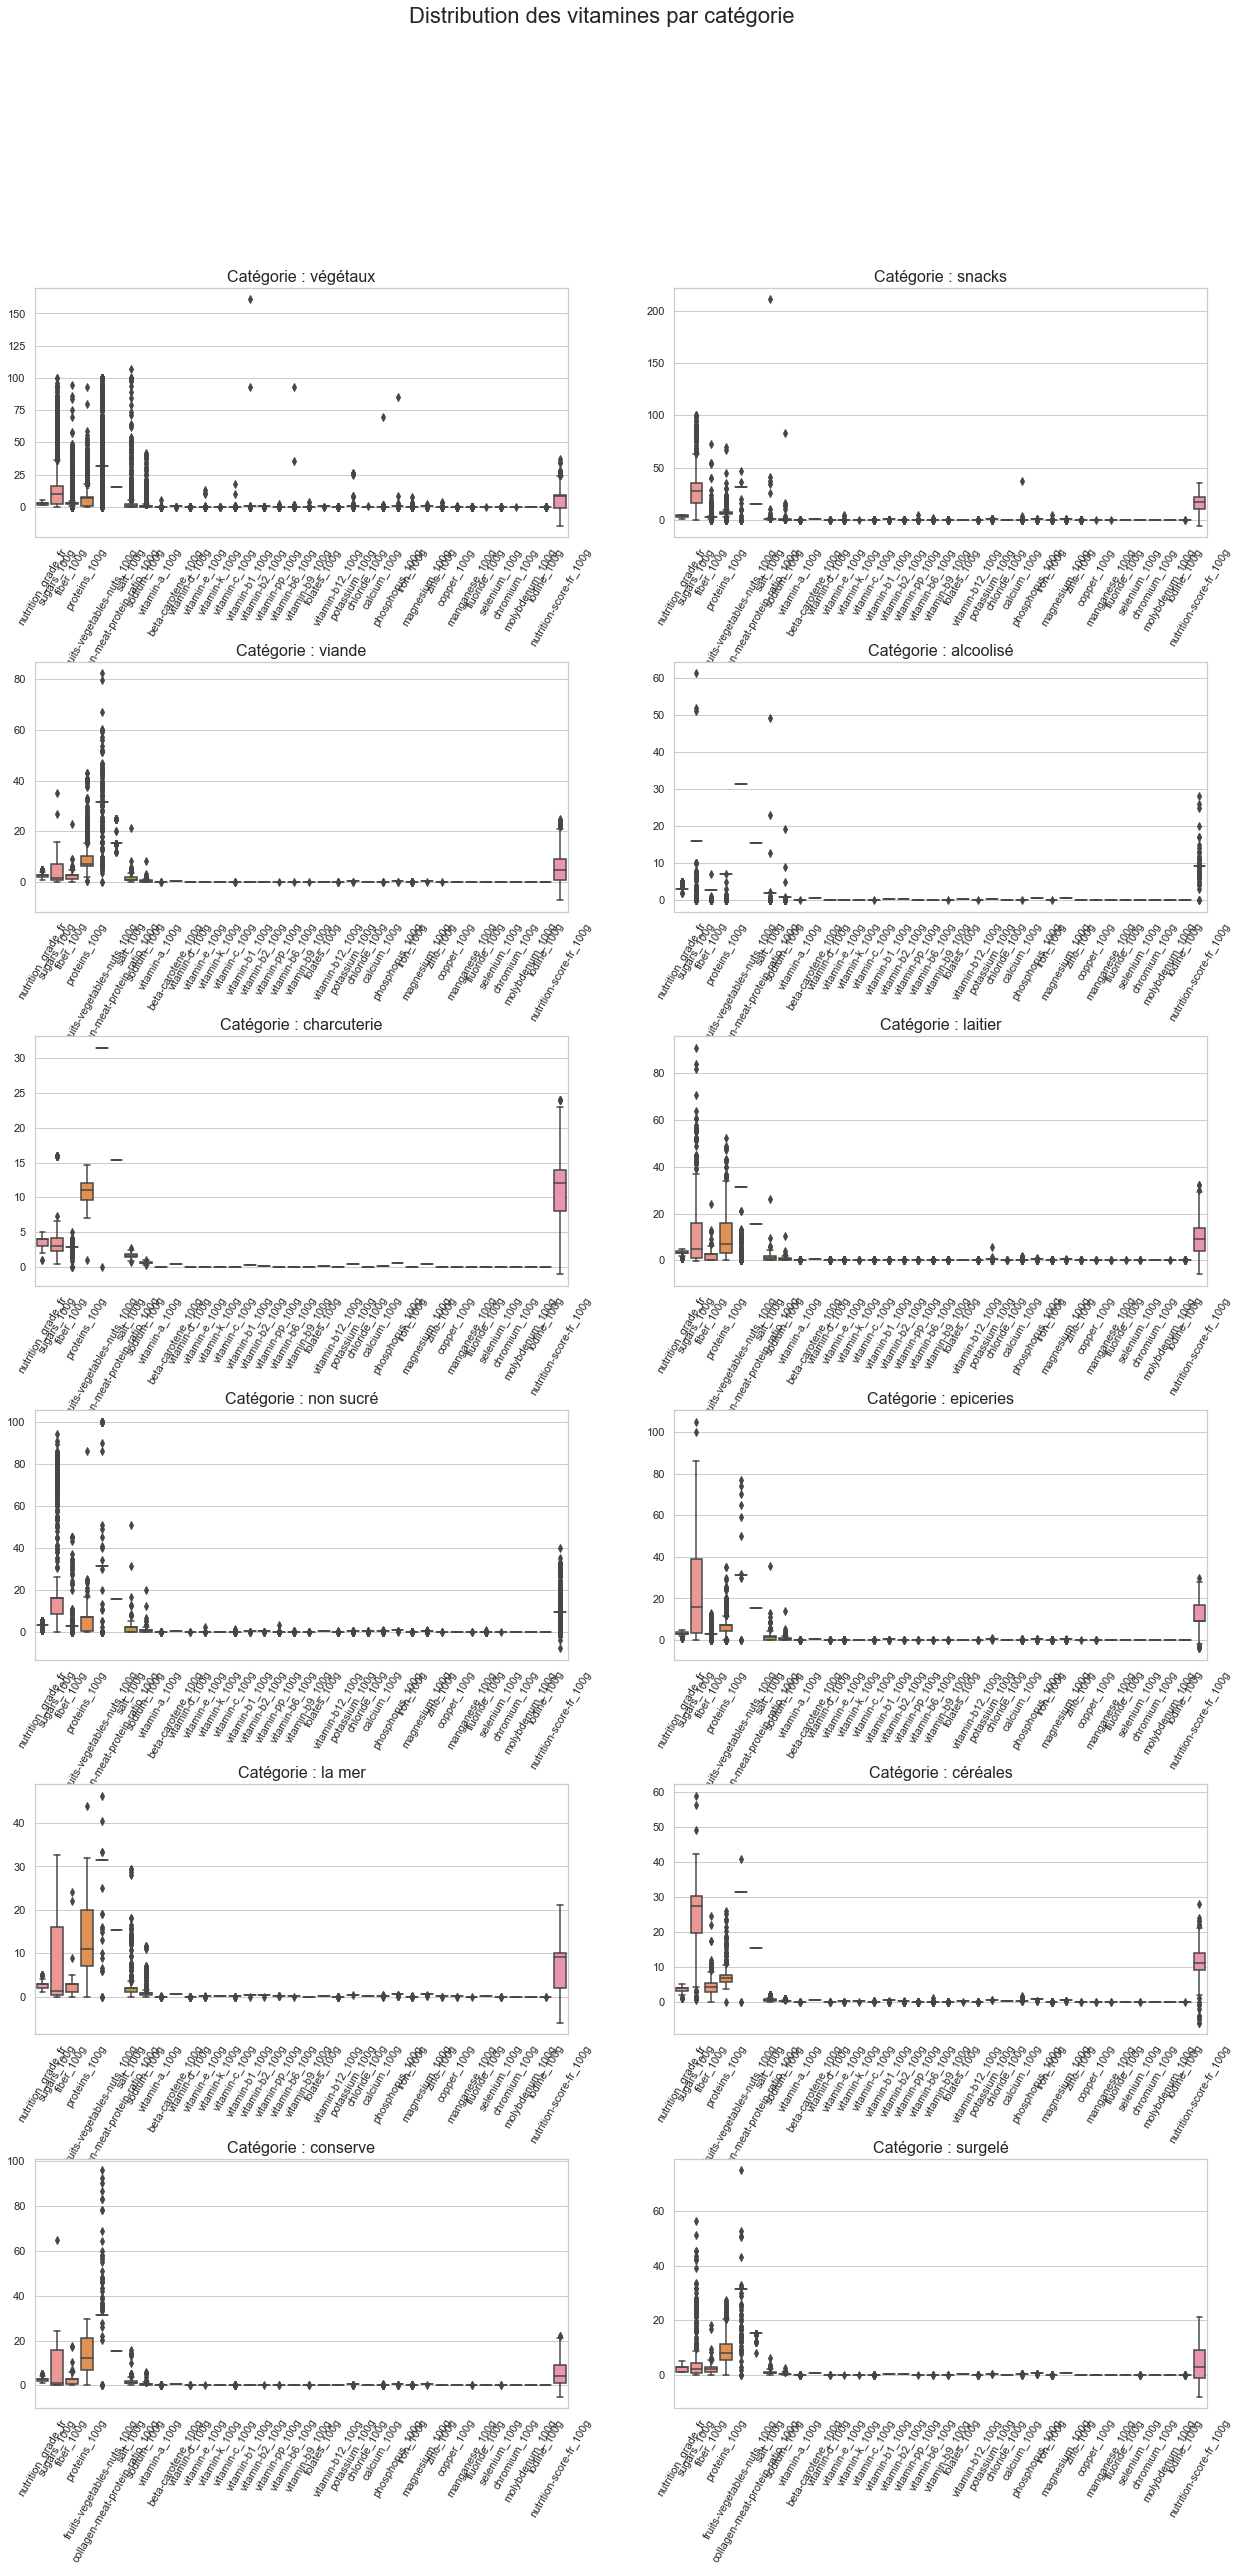

In [156]:
n_sub = len(vitam_flg['flag'].unique())
n_col = 2
fig, axes = plt.subplots(int(n_sub/n_col), n_col, sharex=False, sharey=False, figsize=(21,int(3*n_sub)))
axes = np.array(axes)
fig.suptitle("Distribution des vitamines par catégorie", fontsize=22)
i=0
for ax in axes.reshape(-1):
    cat = vitam_flg['flag'].unique()[i]
    subset = vitam_flg[vitam_flg['flag']==cat]
    sns.boxplot(data=subset, ax=ax)
    ax.set_title('Catégorie : {}'.format(cat), fontsize = 16)
    plt.gcf().subplots_adjust(hspace=0.5)
    plt.setp(ax.get_xticklabels(), rotation=60)
    i+=1
plt.show()

c:\Users\USER\Documents\Python_Hello\.venv\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1080x576 with 0 Axes>

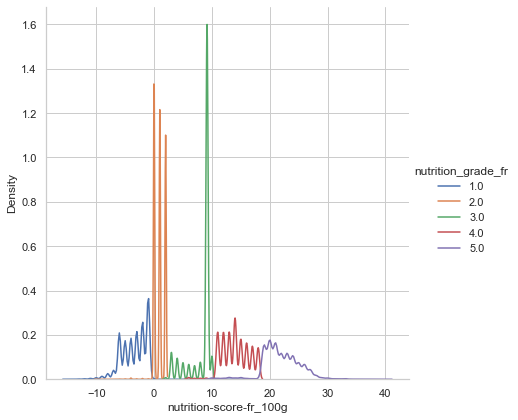

In [157]:
plt.figure(figsize=(15,8))
sns.FacetGrid(df_perf, hue="nutrition_grade_fr", size=6) \
   .map(sns.kdeplot, "nutrition-score-fr_100g") \
   .add_legend()

# TEST ANOVA : Analyse de la variance

In [158]:
vitam_flg.columns

Index(['nutrition_grade_fr', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'fruits-vegetables-nuts_100g', 'collagen-meat-protein-ratio_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'beta-carotene_100g',
       'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g',
       'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g',
       'vitamin-b6_100g', 'vitamin-b9_100g', 'folates_100g',
       'vitamin-b12_100g', 'potassium_100g', 'chloride_100g', 'calcium_100g',
       'phosphorus_100g', 'iron_100g', 'magnesium_100g', 'zinc_100g',
       'copper_100g', 'manganese_100g', 'fluoride_100g', 'selenium_100g',
       'chromium_100g', 'molybdenum_100g', 'iodine_100g',
       'nutrition-score-fr_100g', 'flag'],
      dtype='object')

In [159]:
vitam_flg.columns = ['nutrition_grade', 'sugars','fiber', 'proteins','fruits_vegetables_nuts', 'collagenmeatproteinratio',
                     'salt', 'sodium', 'vitamin_a', 'beta_carotene',
       'vitamin_d', 'vitamin_e', 'vitamin_k', 'vitamin_c',
       'vitamin_b1', 'vitamin_b2', 'vitamin_pp',
       'vitamin_b6', 'vitamin_b9', 'folates',
       'vitamin_b12', 'potassium', 'chloride', 'calcium', 'phosphorus', 'iron',
       'magnesium', 'zinc', 'copper', 'manganese', 'fluoride', 'selenium', 'chromium', 'molybdenum', 'iodine',
       'nutrition_score', 'flag']

In [160]:
df_vitam.columns

Index(['nutrition_grade_fr', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'fruits-vegetables-nuts_100g', 'collagen-meat-protein-ratio_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'beta-carotene_100g',
       'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g',
       'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g',
       'vitamin-b6_100g', 'vitamin-b9_100g', 'folates_100g',
       'vitamin-b12_100g', 'potassium_100g', 'chloride_100g', 'calcium_100g',
       'phosphorus_100g', 'iron_100g', 'magnesium_100g', 'zinc_100g',
       'copper_100g', 'manganese_100g', 'fluoride_100g', 'selenium_100g',
       'chromium_100g', 'molybdenum_100g', 'iodine_100g',
       'nutrition-score-fr_100g', 'flag'],
      dtype='object')

In [161]:
df_vitam.columns = ['nutrition_grade', 'sugars','fiber', 'proteins','fruits_vegetables_nuts', 'collagenmeatproteinratio',
       'salt', 'sodium', 'vitamin_a', 'beta_carotene',
       'vitamin_d', 'vitamin_e', 'vitamin_k', 'vitamin_c',
       'vitamin_b1', 'vitamin_b2', 'vitamin_pp',
       'vitamin_b6', 'vitamin_b9', 'folates',
       'vitamin_b12', 'potassium', 'chloride', 'calcium', 'phosphorus', 'iron',
       'magnesium', 'zinc', 'copper', 'manganese', 'fluoride', 'selenium', 'chromium', 'molybdenum', 'iodine',
       'nutrition_score', 'flag']

In [162]:
vitam_flg.columns

Index(['nutrition_grade', 'sugars', 'fiber', 'proteins',
       'fruits_vegetables_nuts', 'collagenmeatproteinratio', 'salt', 'sodium',
       'vitamin_a', 'beta_carotene', 'vitamin_d', 'vitamin_e', 'vitamin_k',
       'vitamin_c', 'vitamin_b1', 'vitamin_b2', 'vitamin_pp', 'vitamin_b6',
       'vitamin_b9', 'folates', 'vitamin_b12', 'potassium', 'chloride',
       'calcium', 'phosphorus', 'iron', 'magnesium', 'zinc', 'copper',
       'manganese', 'fluoride', 'selenium', 'chromium', 'molybdenum', 'iodine',
       'nutrition_score', 'flag'],
      dtype='object')

In [163]:
df_vitam.columns

Index(['nutrition_grade', 'sugars', 'fiber', 'proteins',
       'fruits_vegetables_nuts', 'collagenmeatproteinratio', 'salt', 'sodium',
       'vitamin_a', 'beta_carotene', 'vitamin_d', 'vitamin_e', 'vitamin_k',
       'vitamin_c', 'vitamin_b1', 'vitamin_b2', 'vitamin_pp', 'vitamin_b6',
       'vitamin_b9', 'folates', 'vitamin_b12', 'potassium', 'chloride',
       'calcium', 'phosphorus', 'iron', 'magnesium', 'zinc', 'copper',
       'manganese', 'fluoride', 'selenium', 'chromium', 'molybdenum', 'iodine',
       'nutrition_score', 'flag'],
      dtype='object')

In [164]:
vitam_flg['flag'].unique().size

13

In [165]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

**1. Test ANOVA entre variable nutrition score et différentes catégories.**

In [166]:
anova_cat = smf.ols('nutrition_score~flag',     
                data=vitam_flg).fit() # ordinary least square regression
print(anova_cat.summary())

                            OLS Regression Results                            
Dep. Variable:        nutrition_score   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     1436.
Date:                Thu, 24 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:18:55   Log-Likelihood:            -1.8077e+05
No. Observations:               55183   AIC:                         3.616e+05
Df Residuals:                   55170   BIC:                         3.617e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               9.1697    

In [167]:
aov_table = sm.stats.anova_lm(anova_cat, typ=2)
print(aov_table)

                 sum_sq           df           F   PR(>F)
flag      706897.980852    12.000000 1435.973897 0.000000
Residual 2263246.896552 55170.000000         NaN      NaN


**Interpretation(1) :**


P-value de la plupart de catégories < 0.05, nous rejetons l'hypothèse nulle, catégorie sont statistiquement signifiantes pour nutri-score.

**2. Test ANOVA pour tester les relations entre differents types de vitamine et nutrition score.**

In [168]:
# relation entre Nutri-score et les vitamines (#')
anova_score_vitams = smf.ols('nutrition_score ~ vitamin_a + beta_carotene + vitamin_d+ vitamin_e + vitamin_k + vitamin_c + vitamin_b1+ vitamin_b2 + vitamin_pp + vitamin_b6 + vitamin_b9 + folates + vitamin_b12 + fiber + proteins + fruits_vegetables_nuts',    
                data=df_vitam).fit() # ordinary least square regression
print(anova_score_vitams.summary())

                            OLS Regression Results                            
Dep. Variable:        nutrition_score   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     279.0
Date:                Thu, 24 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:18:56   Log-Likelihood:            -1.1001e+06
No. Observations:              320772   AIC:                         2.200e+06
Df Residuals:                  320755   BIC:                         2.200e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 10

**Interpretation(2):**

Pour vitamin a, b, e, k, d, folates,b9, b12, biotin avec *p-value 0.751 0.778 0.338 0.526 0.234 0.468 0.055 0.886 0.835 0.739*, nous ne pouvons pas rejetter l'hypothèse nulle, car p-value > notre alpha 0.05, ces types de vitamine ne varient pas auprès de la variation de nutrition score.

Pour vitamin b1, b2, pp, b6, avec *p-value 0.001 0.000 0.001 0.003* < 0.05, qui sont statistiquement signifiante. Nous considérons qu'il y a une grande possibilité qu'il existe des relations fortes entre ces variables. Nous rejectons l'hypothèse H0.

**3. Test MANOVA (Multivariate Analysis of Variance) sur les relations entre différents types vitamines et différentes catégories**

In [169]:
vitam_flg.columns

Index(['nutrition_grade', 'sugars', 'fiber', 'proteins',
       'fruits_vegetables_nuts', 'collagenmeatproteinratio', 'salt', 'sodium',
       'vitamin_a', 'beta_carotene', 'vitamin_d', 'vitamin_e', 'vitamin_k',
       'vitamin_c', 'vitamin_b1', 'vitamin_b2', 'vitamin_pp', 'vitamin_b6',
       'vitamin_b9', 'folates', 'vitamin_b12', 'potassium', 'chloride',
       'calcium', 'phosphorus', 'iron', 'magnesium', 'zinc', 'copper',
       'manganese', 'fluoride', 'selenium', 'chromium', 'molybdenum', 'iodine',
       'nutrition_score', 'flag'],
      dtype='object')

In [170]:
from statsmodels.multivariate.manova import MANOVA

In [171]:
manov = MANOVA.from_formula(data= vitam_flg, formula='vitamin_a + beta_carotene + vitamin_d+ vitamin_e + \
                                                vitamin_k + vitamin_c + vitamin_b1+ vitamin_b2 + vitamin_pp + \
                                                    vitamin_b6 + vitamin_b9 + folates + vitamin_b12 ~ flag')

In [172]:
print(manov.mv_test()) 

                       Multivariate linear model
                                                                        
------------------------------------------------------------------------
       Intercept          Value    Num DF   Den DF     F Value    Pr > F
------------------------------------------------------------------------
          Wilks' lambda    0.0007 13.0000 55158.0000 5816046.0467 0.0000
         Pillai's trace    0.9993 13.0000 55158.0000 5816046.0467 0.0000
 Hotelling-Lawley trace 1370.7640 13.0000 55158.0000 5816046.0467 0.0000
    Roy's greatest root 1370.7640 13.0000 55158.0000 5816046.0467 0.0000
------------------------------------------------------------------------
                                                                        
-------------------------------------------------------------------------
            flag           Value    Num DF      Den DF    F Value  Pr > F
-------------------------------------------------------------------------

**Interpretation (3) :**

On se répère sur Pillai's trace : P Value < 0.05, les types de catégories sont statistiquement signifiantes aux vitamines. Différent type de catégorie impactent différamment les contenances des vitamines. 

# Réduction du dimension
Nous allons réduire le nombre de colonne par méthode ACP :

In [206]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=30, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)
def plot_dendrogram(Z, names):
    plt.figure(figsize=(10,25))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "left",
    )
    plt.show()

In [174]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing

**1. Choix du nombre de composantes à calculer**

In [175]:
n_comp = 30

In [176]:
df_vitam.shape

(320772, 37)

In [177]:
df_vitam.head()

,nutrition_grade,sugars,fiber,proteins,fruits_vegetables_nuts,collagenmeatproteinratio,salt,sodium,vitamin_a,beta_carotene,vitamin_d,vitamin_e,vitamin_k,vitamin_c,vitamin_b1,vitamin_b2,vitamin_pp,vitamin_b6,vitamin_b9,folates,vitamin_b12,potassium,chloride,calcium,phosphorus,iron,magnesium,zinc,copper,manganese,fluoride,selenium,chromium,molybdenum,iodine,nutrition_score,flag
0,3.000000,16.003484,2.862111,7.075940,31.458587,15.412121,2.028624,0.798815,0.000397,0.518715,0.000008,0.056705,0.034219,0.023367,0.325574,0.259007,0.020303,0.023378,0.006898,0.205856,0.000089,0.424635,0.092638,0.125163,0.617282,0.003652,0.534143,0.007950,0.025794,0.003014,0.012161,0.003126,0.001690,0.000401,0.000427,9.165535,NaN
1,4.000000,14.290000,3.600000,3.570000,31.458587,15.412121,0.000000,0.000000,0.000000,0.518715,0.000008,0.056705,0.034219,0.021400,0.325574,0.259007,0.020303,0.023378,0.006898,0.205856,0.000089,0.424635,0.092638,0.000000,0.617282,0.001290,0.534143,0.007950,0.025794,0.003014,0.012161,0.003126,0.001690,0.000401,0.000427,14.000000,NaN
2,2.000000,17.860000,7.100000,17.860000,31.458587,15.412121,0.635000,0.250000,0.000000,0.518715,0.000008,0.056705,0.034219,0.000000,0.325574,0.259007,0.020303,0.023378,0.006898,0.205856,0.000089,0.424635,0.092638,0.071000,0.617282,0.001290,0.534143,0.007950,0.025794,0.003014,0.012161,0.003126,0.001690,0.000401,0.000427,0.000000,NaN
3,4.000000,3.570000,7.100000,17.860000,31.458587,15.412121,1.224280,0.482000,0.000397,0.518715,0.000008,0.056705,0.034219,0.023367,0.325574,0.259007,0.020303,0.023378,0.006898,0.205856,0.000089,0.424635,0.092638,0.143000,0.617282,0.005140,0.534143,0.007950,0.025794,0.003014,0.012161,0.003126,0.001690,0.000401,0.000427,12.000000,NaN
4,3.000000,16.003484,5.700000,8.570000,31.458587,15.412121,2.028624,0.798815,0.000397,0.518715,0.000008,0.056705,0.034219,0.023367,0.325574,0.259007,0.020303,0.023378,0.006898,0.205856,0.000089,0.424635,0.092638,0.125163,0.617282,0.003652,0.534143,0.007950,0.025794,0.003014,0.012161,0.003126,0.001690,0.000401,0.000427,9.165535,NaN


In [178]:
# préparation des données pour l'ACP
df_vitam.drop(['flag'], axis=1, inplace= True)
X = df_vitam.values

In [179]:
print(type(X))

<class 'numpy.ndarray'>


In [180]:
print(X)

[[3.00000000e+00 1.60034835e+01 2.86211095e+00 ... 4.00690909e-04
  4.27068547e-04 9.16553501e+00]
 [4.00000000e+00 1.42900000e+01 3.60000000e+00 ... 4.00690909e-04
  4.27068547e-04 1.40000000e+01]
 [2.00000000e+00 1.78600000e+01 7.10000000e+00 ... 4.00690909e-04
  4.27068547e-04 0.00000000e+00]
 ...
 [3.00000000e+00 1.60034835e+01 2.86211095e+00 ... 4.00690909e-04
  4.27068547e-04 9.16553501e+00]
 [3.00000000e+00 1.60034835e+01 2.86211095e+00 ... 4.00690909e-04
  4.27068547e-04 9.16553501e+00]
 [3.00000000e+00 0.00000000e+00 2.86211095e+00 ... 4.00690909e-04
  4.27068547e-04 9.16553501e+00]]


In [181]:
X.shape

(320772, 36)

In [182]:
df_vitam.columns

Index(['nutrition_grade', 'sugars', 'fiber', 'proteins',
       'fruits_vegetables_nuts', 'collagenmeatproteinratio', 'salt', 'sodium',
       'vitamin_a', 'beta_carotene', 'vitamin_d', 'vitamin_e', 'vitamin_k',
       'vitamin_c', 'vitamin_b1', 'vitamin_b2', 'vitamin_pp', 'vitamin_b6',
       'vitamin_b9', 'folates', 'vitamin_b12', 'potassium', 'chloride',
       'calcium', 'phosphorus', 'iron', 'magnesium', 'zinc', 'copper',
       'manganese', 'fluoride', 'selenium', 'chromium', 'molybdenum', 'iodine',
       'nutrition_score'],
      dtype='object')

In [183]:
names = df_vitam # ou data.index pour avoir les intitulés
features = df_vitam.columns

**2. Centrer et réduire les colonnes quantitatives**

In [184]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)

In [185]:
X_scaled = std_scale.transform(X)

In [186]:
# visualiser les data centrés réduites
vitam_scaled = pd.DataFrame(X_scaled, columns=df_vitam.columns)
vitam_scaled.head()

,nutrition_grade,sugars,fiber,proteins,fruits_vegetables_nuts,collagenmeatproteinratio,salt,sodium,vitamin_a,beta_carotene,vitamin_d,vitamin_e,vitamin_k,vitamin_c,vitamin_b1,vitamin_b2,vitamin_pp,vitamin_b6,vitamin_b9,folates,vitamin_b12,potassium,chloride,calcium,phosphorus,iron,magnesium,zinc,copper,manganese,fluoride,selenium,chromium,molybdenum,iodine,nutrition_score
0,-0.120040,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000
1,0.769025,-0.087818,0.072463,-0.463164,-0.000000,0.000000,-0.017720,-0.017724,-0.008264,0.000000,-0.000000,-0.000000,-0.000000,-0.001327,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.056882,0.000000,-0.016651,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.642856
2,-1.009105,0.095149,0.416176,1.424665,-0.000000,0.000000,-0.012174,-0.012177,-0.008264,0.000000,-0.000000,-0.000000,-0.000000,-0.015767,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.024615,0.000000,-0.016651,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-1.218773
3,0.769025,-0.637234,0.416176,1.424665,-0.000000,0.000000,-0.007026,-0.007029,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.008106,0.000000,0.010484,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.376909
4,-0.120040,0.000000,0.278691,0.197378,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000


In [187]:
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=30)

**3. Eboulir des valeurs propres**

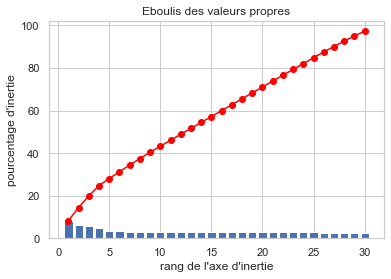

In [188]:
# Eboulis des valeurs propres
display_scree_plot(pca)

In [214]:
# variance expliquée
var_exp = pca.explained_variance_ratio_*100
print("Le premier plan factoriel couvrira une inertie de {:.2f}%, le second plan : {:.2f}%, et le 15 ème plan: {:.2f}%".format(var_exp[0:2].sum(),
                                                                                                     var_exp[0:4].sum(),
                                                                                                     var_exp[0:30].sum()))

Le premier plan factoriel couvrira une inertie de 14.42%, le second plan : 24.75%, et le 15 ème plan: 97.32%


*[Commentaire] Jusqu'aux 15 facteurs (sur 36) qu'il n'est toujours pas suffisant à expliquer notre jeu de données *vitamine*. 
On considère ces variables sont peu correlées.*

**4. Etablir cercle des corrélations**

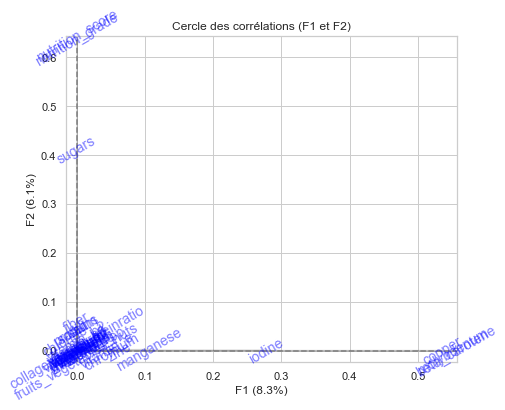

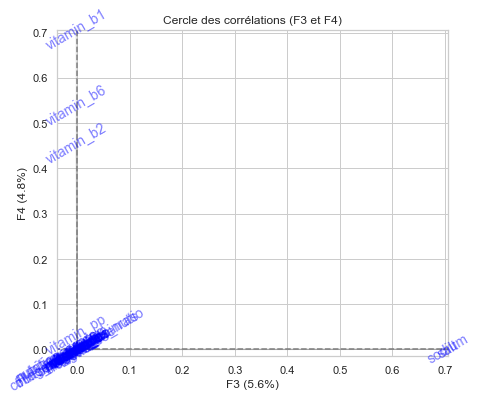

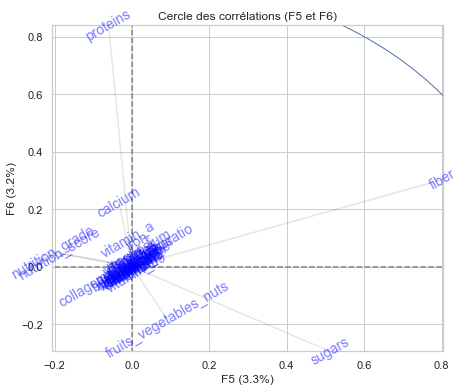

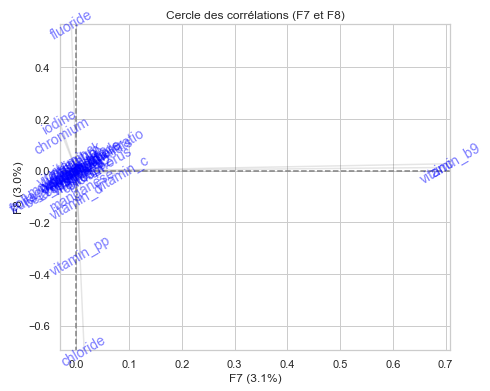

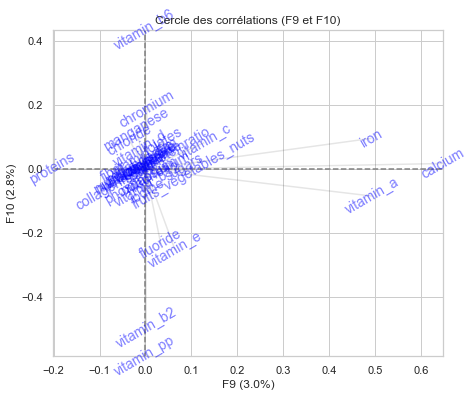

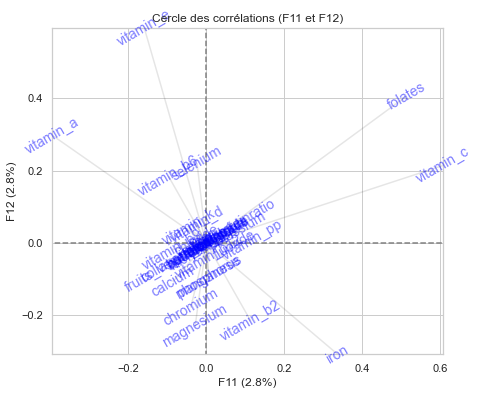

In [207]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5),(6,7),(8,9),(10,11)], labels = np.array(features)) # print les premiers 6 plans des composantes principales

**5. Projection des individus**

In [191]:
X_projected = pca.transform(X_scaled)

display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(names))
plt.show()

**6. Calcul les composantes principales**

In [196]:
df_comp =  pd.DataFrame(X_projected, columns=['F'+str(i+1) for i in range(30)])

In [197]:
df_comp.head() # voici on obtient les nouvelles variables de F1 à F30

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30
0,-0.000066,-0.076442,0.004516,0.001656,0.024644,-0.006118,-0.000896,-0.002048,0.002679,-0.000611,-0.000411,-0.000005,0.000258,-0.000799,-0.000240,0.000211,-0.000534,-0.000133,-0.000765,-0.000738,-0.000656,-0.002647,0.004289,-0.001124,0.000418,-0.000242,0.001318,-0.002121,-0.000164,0.000117
1,0.000641,0.850668,-0.073190,-0.019499,-0.235197,-0.288079,0.001524,0.016377,0.002337,0.003167,0.001629,0.007864,-0.004027,0.016351,0.002953,0.000187,0.005575,0.001145,0.011548,0.011201,0.011913,-0.018032,0.021443,-0.008398,0.002885,-0.010751,-0.008651,0.020905,0.001448,0.004601
2,-0.003060,-1.307248,0.053041,0.031970,0.732706,1.180715,0.001260,-0.000176,-0.293360,-0.013667,-0.006301,0.009415,0.007789,-0.045772,-0.017879,-0.004155,-0.012844,-0.005753,-0.035994,-0.035524,-0.018368,0.108237,-0.144465,0.064265,-0.016659,0.040781,-0.006943,0.072333,-0.003358,-0.014799
3,-0.000112,0.552780,-0.045358,-0.006738,-0.305649,1.569865,0.037462,0.063881,-0.384725,0.002414,0.028257,0.003573,0.008298,-0.022804,-0.007527,-0.011677,0.004387,-0.002407,-0.011857,-0.014480,0.001974,0.204823,-0.318469,0.113316,-0.038781,0.053929,-0.051405,0.152504,0.002819,-0.010470
4,-0.000128,-0.052232,0.001770,0.001837,0.236747,0.244127,-0.000143,0.004410,-0.056651,-0.002238,-0.000999,0.002904,0.002228,-0.011965,-0.005983,-0.000338,-0.003200,-0.002151,-0.008393,-0.008381,-0.003915,0.017709,-0.024639,0.014300,-0.003242,0.007664,-0.004663,0.013177,-0.000166,-0.001877


In [205]:
f1 = pca.components_[0]
print('f1 ='+' '+str(f1))

f1 = [ 5.48062591e-04 -4.11091698e-04  4.40018866e-04 -9.34984798e-04
 -3.92063415e-04  6.67478497e-06  1.12102489e-03  1.12096008e-03
  2.36786638e-03  5.56649774e-01  1.01209418e-02  4.42704997e-02
 -9.68719309e-05  9.61217090e-03  1.27126453e-03  1.42646390e-03
  2.69871629e-02  1.73024682e-03  4.54992321e-03  7.74435744e-06
  5.20389050e-04  8.77780920e-04 -1.59805580e-02  1.02665219e-02
  7.25727654e-03  3.25451945e-03  7.22926208e-03  6.21417185e-02
  5.36536880e-01  1.05362225e-01  4.38255214e-03  1.72539202e-04
  5.09869019e-02  5.51495136e-01  2.77745676e-01  6.67346287e-04]


In [208]:
f9 = pca.components_[8]
print('f9 ='+' '+str(f9))

f9 = [-2.23197148e-02  8.35304413e-02 -6.94826823e-02 -2.02485339e-01
  1.05075970e-01 -5.50201500e-03 -4.34037136e-04 -4.33964069e-04
  4.94472748e-01 -7.97956780e-03 -1.17525686e-02  6.48327713e-02
 -1.77398550e-02  1.28235085e-01 -1.01828784e-03  1.74666955e-03
 -1.95309378e-03 -1.39412653e-03 -2.13413201e-02  3.96762275e-02
  5.83149083e-03  7.60726688e-03 -3.51916080e-02  6.48815862e-01
 -1.90716626e-02  4.92302611e-01  2.59910513e-02 -1.24317721e-02
 -7.90513370e-03 -1.94414434e-02  3.34951266e-02  7.01386833e-03
  3.23890597e-03 -7.02829543e-03  4.03095006e-03 -1.95492196e-02]


Interpretation nouvelle vecteur f9

In [210]:
f10 = pca.components_[9]
print('f10 ='+' '+str(f10))

f10 = [ 5.09245825e-03  4.51621671e-03 -6.53550108e-03  9.88419304e-04
 -5.09256313e-03  2.33254603e-03  4.03525460e-04  4.03971538e-04
 -8.39977885e-02  8.95335796e-03  6.18667045e-02 -2.53428188e-01
  2.99552194e-02  8.31087908e-02  1.99910336e-02 -4.95102402e-01
 -5.84088682e-01  4.34091764e-01  2.12203447e-03  8.77121200e-02
 -4.91309946e-02 -1.98449636e-02  9.13891925e-02  1.78332043e-02
 -4.26388172e-02  9.62259962e-02 -1.11208678e-02  8.66739688e-03
  9.95149958e-03  1.23457068e-01 -2.33897412e-01  1.70154436e-02
  1.88322263e-01  2.53243780e-02 -6.96425711e-02  4.08481205e-03]


In [212]:
f11 = pca.components_[10]
print('f11 ='+' '+str(f11))

f11 = [ 3.42779455e-03 -1.41030188e-02 -1.04912690e-02  1.18363830e-02
 -5.05963369e-02  5.27038709e-03 -3.13656618e-04 -3.13688952e-04
 -3.94940959e-01 -2.79455131e-04 -2.46330887e-02 -1.59203553e-01
 -4.52601876e-02  6.07234423e-01 -2.39950198e-03  1.13738292e-01
  1.18708473e-01 -9.70161269e-02 -8.77878344e-02  5.13687222e-01
  7.66669055e-03  7.83175408e-02 -2.40909805e-02 -8.63934029e-02
  6.36627809e-03  3.36803816e-01 -2.88361560e-02 -1.17600457e-02
 -2.59939250e-04  4.16139710e-03  7.18451052e-02 -2.40010365e-02
 -4.00710198e-02 -3.47865872e-03  1.19241480e-02  3.45610001e-03]


In [213]:
f12 = pca.components_[11]
print('f12 ='+' '+str(f12))

f12 = [ 4.31083401e-05  1.25023992e-03  8.02866164e-03  3.40388698e-03
 -3.09857260e-02  5.23829990e-03 -1.11437144e-04 -1.11545032e-04
  2.97432706e-01 -2.55257308e-03  4.92357689e-02  5.94156252e-01
  4.27064674e-02  2.14199424e-01  1.04924795e-03 -2.15881771e-01
  7.88769508e-03  1.84016583e-01 -1.82743054e-02  4.06240360e-01
 -3.97131128e-02  3.20042970e-02  6.14257253e-03 -1.07633960e-01
 -9.42256705e-02 -3.08077321e-01 -2.30690914e-01  2.88263999e-03
 -3.56760753e-03 -9.59969301e-02 -6.32088815e-03  2.20867383e-01
 -1.78503213e-01 -1.10217472e-02  1.17799232e-02  6.55274463e-04]
